# Building the ML Models

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('cleaned_apartment_df.pkl')

In [3]:
df.head()

,bathrooms,bedrooms,price,square_feet,city,state,latitude,longitude,region
0,1.0,1.0,2195.0,542.0,Redondo Beach,CA,33.8520,-118.3759,West
1,1.5,3.0,1250.0,1500.0,Newport News,VA,37.0867,-76.4941,South
2,2.0,3.0,1395.0,1650.0,Raleigh,NC,35.8230,-78.6438,South
3,1.0,2.0,1600.0,820.0,Vacaville,CA,38.3622,-121.9712,West
4,1.0,1.0,975.0,624.0,Albuquerque,NM,35.1038,-106.6110,West


In [4]:
# Define features and target variable
X = df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'state', 'region']]
y = df['price']

# One-Hot Encode the 'state' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']),
        ('cat', OneHotEncoder(), ['state', 'region'])
    ])

# Create a pipeline with a preprocessor and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Overall Root Mean Squared Error: {rmse}')
print(f'Overall R-squared: {r2}')

Overall Root Mean Squared Error: 203.44024377230454
Overall R-squared: 0.8458096698592319


In [5]:
# Create a DataFrame with predictions and actual values
results = X_test.copy()
results['actual_price'] = y_test
results['predicted_price'] = y_pred

# Analyze performance by state
state_performance = results.groupby('state').apply(
    lambda df: pd.Series({
        'RMSE': mean_squared_error(df['actual_price'], df['predicted_price'], squared=False),
        'R-squared': r2_score(df['actual_price'], df['predicted_price']),
        'Count': len(df)
    })
)

print(state_performance)

             RMSE   R-squared   Count
state                                
AK     206.893244    0.002106     6.0
AL     280.591222    0.240766    66.0
AR     130.862181    0.622121   121.0
AZ     162.662542    0.769008   476.0
CA     235.406130    0.795669  1581.0
CO     165.063687    0.819907  1295.0
CT     178.654145    0.749258   110.0
DC     310.580914   -1.142304    13.0
DE      14.841964         NaN     1.0
FL     228.423570    0.702708  1067.0
GA     237.013171    0.596600   948.0
HI     316.556861    0.729430     5.0
IA     207.650178    0.446868    70.0
ID     340.582191   -0.186394    17.0
IL     270.251976    0.686434   188.0
IN     196.712486    0.607473    98.0
KS     130.509819    0.844453   184.0
KY     151.548430    0.752876   182.0
LA     153.764654    0.802848   276.0
MA     240.873590    0.755094   804.0
MD     188.927091    0.742070   988.0
ME     197.669542   -0.116379     3.0
MI     294.692430    0.469564   121.0
MN     246.227593    0.634387   124.0
MO     226.4

c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [6]:
# Create a DataFrame with predictions and actual values
results = X_test.copy()
results['actual_price'] = y_test
results['predicted_price'] = y_pred

# Analyze performance by state
region_performance = results.groupby('region').apply(
    lambda df: pd.Series({
        'RMSE': mean_squared_error(df['actual_price'], df['predicted_price'], squared=False),
        'R-squared': r2_score(df['actual_price'], df['predicted_price']),
        'Count': len(df)
    })
)

print(region_performance)

                 RMSE  R-squared   Count
region                                  
Midwest    204.283016   0.748074  2335.0
Northeast  234.063285   0.821506  2201.0
South      197.364480   0.786295  9260.0
West       199.283450   0.863868  4624.0


In [7]:
# Lets see how the performance changes if we remove latitude and longitude 

# Define features and target variable
X = df[['bathrooms', 'bedrooms', 'square_feet', 'state', 'region']]
y = df['price']

# One-Hot Encode the 'state' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet']),
        ('cat', OneHotEncoder(), ['state', 'region'])
    ])

# Create a pipeline with a preprocessor and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Overall Root Mean Squared Error: {rmse}')
print(f'Overall R-squared: {r2}')

Overall Root Mean Squared Error: 331.54241342801146
Overall R-squared: 0.5904927525543745


In [8]:
# What if we remove 'region'?

# Define features and target variable
X = df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'state']]
y = df['price']

# One-Hot Encode the 'state' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']),
        ('cat', OneHotEncoder(), ['state'])
    ])

# Create a pipeline with a preprocessor and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Overall Root Mean Squared Error: {rmse}')
print(f'Overall R-squared: {r2}')

Overall Root Mean Squared Error: 203.46131018536408
Overall R-squared: 0.8457777351220022


In [9]:
# What if we just use numerical features?

# Define features and target variable
X = df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
y = df['price']

# One-Hot Encode the 'state' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']),
    ])

# Create a pipeline with a preprocessor and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Overall Root Mean Squared Error: {rmse}')
print(f'Overall R-squared: {r2}')

Overall Root Mean Squared Error: 201.93419593320888
Overall R-squared: 0.8480841310555858


c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


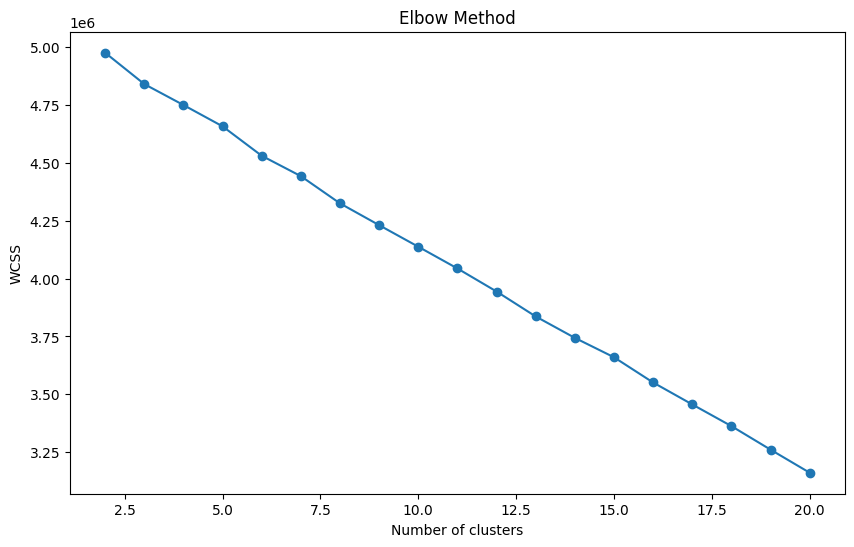

In [10]:
# What if we perform clustering and apply a regressor for each cluster?

# Define features for clustering including the state
X_clustering = df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude','state']]

# One-hot encode the 'state' feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']),
        ('cat', OneHotEncoder(), ['state'])
    ])
X_clustering_encoded = preprocessor.fit_transform(X_clustering)

# Standardize features
scaler = StandardScaler(with_mean=False)  # Ensure with_mean=False to handle sparse matrices
X_clustering_scaled = scaler.fit_transform(X_clustering_encoded)

# Elbow Method
wcss = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Define features for clustering including the state
X_clustering = df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'state']]

# One-hot encode the 'state' feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']),
        ('cat', OneHotEncoder(), ['state'])
    ])
X_clustering_encoded = preprocessor.fit_transform(X_clustering)

# Standardize features
scaler = StandardScaler(with_mean=False)
X_clustering_scaled = scaler.fit_transform(X_clustering_encoded)

# Perform K-Means clustering
n_clusters = 20  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering_scaled)

# Dictionary to store models and performance metrics for each cluster
cluster_models = {}
cluster_performance = {}

# Iterate over each unique cluster
for cluster in df['cluster'].unique():
    # Filter the dataframe for the current cluster
    df_cluster = df[df['cluster'] == cluster]
    
    # Define features and target variable
    X_cluster = df_cluster[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'state']]
    y_cluster = df_cluster['price']
    
    # Encode and scale the features
    X_cluster_encoded = preprocessor.transform(X_cluster)
    X_cluster_scaled = scaler.transform(X_cluster_encoded)
    
    # Train-test split for the cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster_scaled, y_cluster, test_size=0.2, random_state=42)
    
    # Train a RandomForestRegressor model for the cluster
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store the trained model and performance metrics in the dictionary
    cluster_models[cluster] = model
    cluster_performance[cluster] = {'RMSE': rmse, 'R-squared': r2}

# Convert the performance metrics dictionary to a DataFrame for analysis
performance_df = pd.DataFrame(cluster_performance).T  # Transpose for better readability

# Print performance metrics for each cluster
print(performance_df)

c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          RMSE  R-squared
3   225.870458   0.852182
1   183.576734   0.845246
0   183.792165   0.666513
4   184.337591   0.780858
9   249.484349   0.705390
16  233.600516   0.594331
12  219.145363   0.732510
2   184.875495   0.754792
6   206.248724   0.742607
10  211.228429   0.836119
18  181.946094   0.766996
7   183.538115   0.804837
5   129.419675   0.725366
14  142.898307   0.811040
17  248.211680   0.639016
11  250.641612   0.727540
15  173.796958   0.699758
8   147.261825   0.824443
19  136.178596   0.839401
13  378.138167   0.504325


<Figure size 1400x600 with 0 Axes>

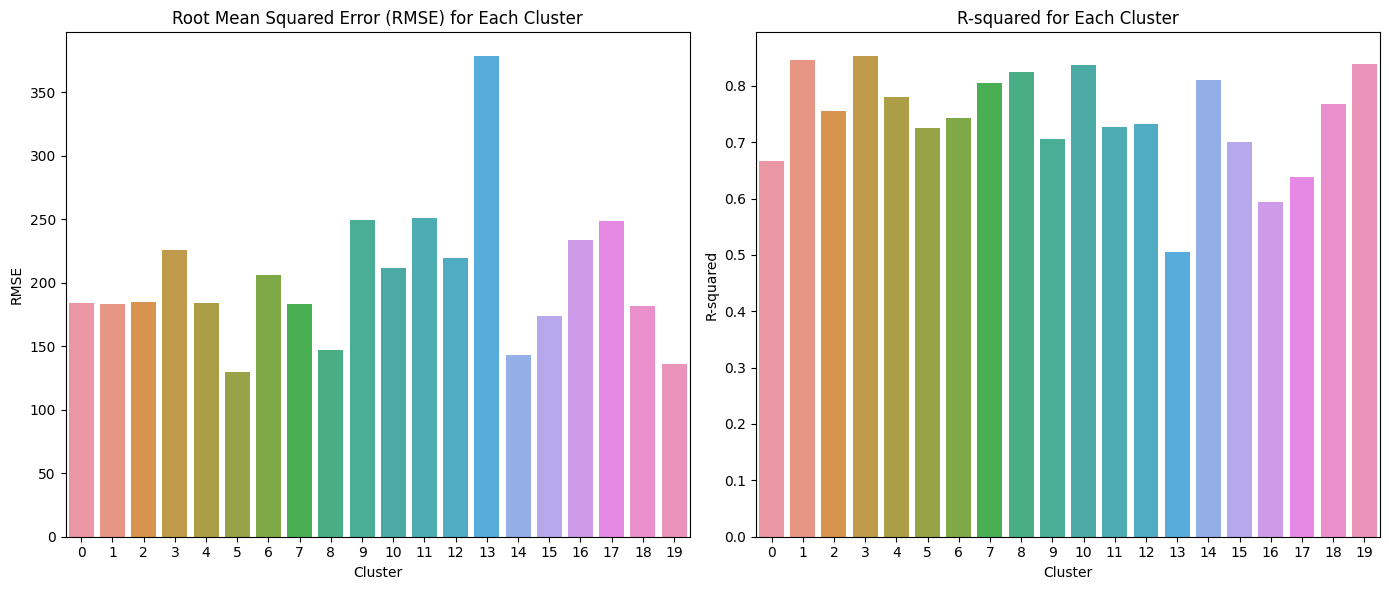

In [12]:
# Plot RMSE and R-squared for each cluster
plt.figure(figsize=(14, 6))

# Sort the performance_df by index (cluster number)
performance_df_sorted = performance_df.sort_index()

# Plot RMSE and R-squared for each cluster
plt.figure(figsize=(14, 6))

# RMSE plot
plt.subplot(1, 2, 1)
sns.barplot(x=performance_df_sorted.index, y='RMSE', data=performance_df_sorted)
plt.title('Root Mean Squared Error (RMSE) for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('RMSE')

# R-squared plot
plt.subplot(1, 2, 2)
sns.barplot(x=performance_df_sorted.index, y='R-squared', data=performance_df_sorted)
plt.title('R-squared for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

I do not like this, the error in some clusters is too large.

Lets try to build a model per state. 

In [13]:
# Calculate the counts of each state
state_counts = df['state'].value_counts()

# Get the states with more than 1000 entries
states_with_more_than_1000 = state_counts[state_counts > 1000].index

# Dictionary to store models and performance metrics for each state
state_models = {}
state_performance = {}

# Preprocessor to scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude'])
    ])

# Iterate over each state with more than 1000 rows
for state in states_with_more_than_1000:
    # Filter the DataFrame for the current state
    df_state = df[df['state'] == state]
    
    # Define features and target variable
    X_state = df_state[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y_state = df_state['price']
    
    # Train-test split for the state
    X_train, X_test, y_train, y_test = train_test_split(X_state, y_state, test_size=0.2, random_state=42)
    
    # Create a pipeline with a preprocessor and a model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate performance metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store the trained model and performance metrics in the dictionary
    state_models[state] = pipeline
    state_performance[state] = {'RMSE': rmse, 'R-squared': r2}

# Convert the performance metrics dictionary to a DataFrame for analysis
performance_df = pd.DataFrame(state_performance).T  # Transpose for better readability

# Print performance metrics for each state
print(performance_df)

          RMSE  R-squared
TX  177.965537   0.765266
VA  184.068279   0.844416
CA  231.763676   0.796727
CO  183.926286   0.781835
NC  183.550277   0.667390
FL  206.787917   0.741259
MD  182.384510   0.765871
OH  183.804353   0.804271
GA  234.036964   0.592813
MA  250.571257   0.727693
NJ  212.098340   0.834767
NV  144.022186   0.812417
WA  189.001243   0.795285
AZ  142.663392   0.811661
LA  147.470509   0.823945
MO  208.636646   0.700919
PA  295.891279   0.634111
TN  171.189763   0.774385
NE  130.355749   0.721379


In [14]:
# Define a simpler parameter grid
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10],
}

# Iterate over each state with more than 1000 rows
for state in states_with_more_than_1000:
    # Filter the DataFrame for the current state
    df_state = df[df['state'] == state]
    
    # Define features and target variable
    X_state = df_state[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y_state = df_state['price']
    
    # Train-test split for the state
    X_train, X_test, y_train, y_test = train_test_split(X_state, y_state, test_size=0.2, random_state=42)
    
    # Create a pipeline with a preprocessor and a model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate performance metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store the trained model and performance metrics in the dictionary
    state_models[state] = best_model
    state_performance[state] = {'RMSE': rmse, 'R-squared': r2}

# Convert the performance metrics dictionary to a DataFrame for analysis
performance_df = pd.DataFrame(state_performance).T  # Transpose for better readability

# Print performance metrics for each state
print(performance_df)

          RMSE  R-squared
TX  177.965537   0.765266
VA  184.068279   0.844416
CA  231.763676   0.796727
CO  183.926286   0.781835
NC  183.550277   0.667390
FL  206.787917   0.741259
MD  182.384510   0.765871
OH  183.804353   0.804271
GA  234.036964   0.592813
MA  247.976010   0.733304
NJ  212.098340   0.834767
NV  145.176004   0.809399
WA  189.001243   0.795285
AZ  142.663392   0.811661
LA  147.470509   0.823945
MO  210.183428   0.696468
PA  294.660149   0.637149
TN  172.147711   0.771853
NE  128.097574   0.730949


I am going to remove states where the model performed well (below $185 RMSE) and focus on improving predictions for the remaining states.

In [15]:
# List of states with RMSE below $185
well_performing_states = ['TX', 'VA', 'CO', 'NC', 'MD', 'OH', 'NV', 'AZ', 'LA', 'TN', 'NE']

# Save each model
# for state in well_performing_states:
#    model = state_models[state]
#    joblib.dump(model, f'{state}_model.pkl')

print("Well-performing state models saved successfully.")

Well-performing state models saved successfully.


In [16]:
# Filter out well-performing states from the dataset
filtered_df = df[~df['state'].isin(well_performing_states)]

print("Filtered dataset created successfully.")

Filtered dataset created successfully.


In [18]:
filtered_df.shape

(42632, 10)

c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\david\anaconda3\Lib\site-packages\sklearn\clust

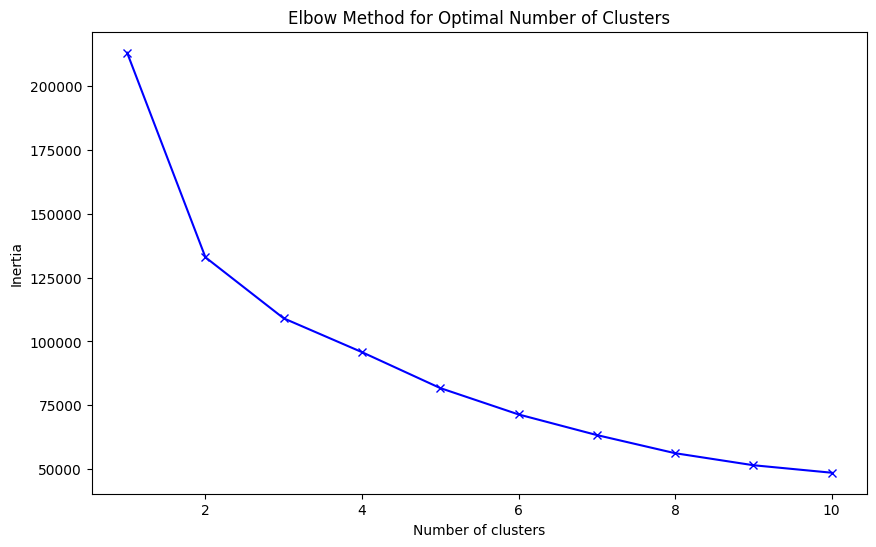

In [20]:
# Select features for clustering
clustering_features = filtered_df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_features)

# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [41]:
# Perform K-Means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the dataframe
filtered_df['cluster'] = clusters

# Function to train and evaluate a model for a given cluster
def train_and_evaluate_cluster_model(cluster_data, cluster_label):
    X = cluster_data[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y = cluster_data['price']
    
    # Split the data (you can also use cross-validation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = RandomForestRegressor(n_estimators=200, max_depth=50, max_features='auto', 
                                  min_samples_leaf=2, min_samples_split=10, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")
    
    return model, rmse, r2

c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\david\AppData\Local\Temp\ipykernel_8556\157983475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = clusters


In [50]:
for cluster_label in range(6):
    cluster_states = filtered_df[filtered_df['cluster'] == cluster_label]['state'].unique()
    print(f"Cluster {cluster_label} has the following states: {', '.join(cluster_states)}")

Cluster 0 has the following states: IL, PA, WI, OK, RI, NJ, IN, MO, ND, MA, IA, NY, KY, SD, MI, MN, DC, KS, CT, VT, NH, AR, DE, ME, WV
Cluster 1 has the following states: WV, IA, WI, DC, ND, MI, IN, MN, MO, PA, IL, OK, SD, MA, KS, NH, RI, SC, GA, NJ, UT, KY, CT, FL, NY, AR, AL, MT, NM, VT, WA, ME, ID, DE, WY, CA, MS
Cluster 2 has the following states: GA, DC, MS, FL, MO, IA, IL, SC, PA, IN, AL, AR, CT, NJ, MI, NY, WI, KS, OK, MN, MA, NH, SD, KY, ME, VT, WV, RI
Cluster 3 has the following states: CA, NM, OR, UT, WA, ID, AK, HI, MT, OK, KS, WY
Cluster 4 has the following states: NM, CA, WA, ND, UT, ID, WI, AK, OR, MN, HI, WY, IA, KS, SD, IL, OK, MT, MO, AR
Cluster 5 has the following states: FL, OK, GA, AR, AL, SC, MS, MO


In [42]:
# Train and evaluate models for each cluster
cluster_models = {}
for cluster_label in range(6):
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_label]
    model, rmse, r2 = train_and_evaluate_cluster_model(cluster_data, cluster_label)
    cluster_models[cluster_label] = (model, rmse, r2)

# Display the evaluation results
for cluster_label, (model, rmse, r2) in cluster_models.items():
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")

c:\Users\david\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Cluster 0 - RMSE: 231.78170982808172, R-squared: 0.8424361199952992


c:\Users\david\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Cluster 1 - RMSE: 237.61655421887036, R-squared: 0.8126018238344737


c:\Users\david\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Cluster 2 - RMSE: 252.6601428512372, R-squared: 0.7761039984613549


c:\Users\david\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Cluster 3 - RMSE: 223.06780188789483, R-squared: 0.8188109316139405


c:\Users\david\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Cluster 4 - RMSE: 241.69662892281758, R-squared: 0.8085276807796294


c:\Users\david\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Cluster 5 - RMSE: 181.7985409638865, R-squared: 0.6877437196761642
Cluster 0 - RMSE: 231.78170982808172, R-squared: 0.8424361199952992
Cluster 1 - RMSE: 237.61655421887036, R-squared: 0.8126018238344737
Cluster 2 - RMSE: 252.6601428512372, R-squared: 0.7761039984613549
Cluster 3 - RMSE: 223.06780188789483, R-squared: 0.8188109316139405
Cluster 4 - RMSE: 241.69662892281758, R-squared: 0.8085276807796294
Cluster 5 - RMSE: 181.7985409638865, R-squared: 0.6877437196761642


In [43]:
# Lets see if we can improve these numbers

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

# Function to train and evaluate a model for a given cluster with simplified hyperparameter tuning
def train_and_tune_cluster_model(cluster_data, cluster_label):
    X = cluster_data[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y = cluster_data['price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the model
    rf = RandomForestRegressor(random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Train the model with hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")
    print(f"Best Parameters for Cluster {cluster_label}: {grid_search.best_params_}")
    
    return best_model, rmse, r2

In [44]:
# Train and tune models for each cluster
cluster_models = {}
for cluster_label in range(6):
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_label]
    model, rmse, r2 = train_and_tune_cluster_model(cluster_data, cluster_label)
    cluster_models[cluster_label] = (model, rmse, r2)

# Display the evaluation results
for cluster_label, (model, rmse, r2) in cluster_models.items():
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 0 - RMSE: 228.9706327765137, R-squared: 0.8462348518966567
Best Parameters for Cluster 0: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 1 - RMSE: 234.19960631218467, R-squared: 0.8179526783412376
Best Parameters for Cluster 1: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 2 - RMSE: 249.0336049878601, R-squared: 0.7824852192012445
Best Parameters for Cluster 2: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 3 - RMSE: 219.0921224463519, R-squared: 0.8252119482184399
Best Parameters for Cluster 3: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for

In [45]:
import xgboost as xgb

# Example: Using XGBoost
def train_xgboost_model(cluster_data, cluster_label):
    X = cluster_data[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y = cluster_data['price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")
    
    return model, rmse, r2

# Train and evaluate XGBoost models for each cluster
xgboost_models = {}
for cluster_label in range(6):
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_label]
    model, rmse, r2 = train_xgboost_model(cluster_data, cluster_label)
    xgboost_models[cluster_label] = (model, rmse, r2)

# Display the evaluation results
for cluster_label, (model, rmse, r2) in xgboost_models.items():
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")


Cluster 0 - RMSE: 239.88315680912925, R-squared: 0.8312289885913595
Cluster 1 - RMSE: 243.9356906700885, R-squared: 0.8025020158401713
Cluster 2 - RMSE: 270.9299229148061, R-squared: 0.742553607893171
Cluster 3 - RMSE: 226.21068650792355, R-squared: 0.8136692843499176
Cluster 4 - RMSE: 245.94353732517303, R-squared: 0.8017397535720239
Cluster 5 - RMSE: 183.80051168030633, R-squared: 0.6808287038659844
Cluster 0 - RMSE: 239.88315680912925, R-squared: 0.8312289885913595
Cluster 1 - RMSE: 243.9356906700885, R-squared: 0.8025020158401713
Cluster 2 - RMSE: 270.9299229148061, R-squared: 0.742553607893171
Cluster 3 - RMSE: 226.21068650792355, R-squared: 0.8136692843499176
Cluster 4 - RMSE: 245.94353732517303, R-squared: 0.8017397535720239
Cluster 5 - RMSE: 183.80051168030633, R-squared: 0.6808287038659844


In [46]:
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

# Example: Combine Random Forest and Gradient Boosting
def train_ensemble_model(cluster_data, cluster_label):
    X = cluster_data[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y = cluster_data['price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define individual models
    rf = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
    
    # Combine models using Voting Regressor
    ensemble = VotingRegressor([('rf', rf), ('gb', gb)])
    ensemble.fit(X_train, y_train)
    
    # Evaluate the ensemble model
    y_pred = ensemble.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")
    
    return ensemble, rmse, r2

# Train and evaluate ensemble models for each cluster
ensemble_models = {}
for cluster_label in range(6):
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_label]
    model, rmse, r2 = train_ensemble_model(cluster_data, cluster_label)
    ensemble_models[cluster_label] = (model, rmse, r2)

# Display the evaluation results
for cluster_label, (model, rmse, r2) in ensemble_models.items():
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")

Cluster 0 - RMSE: 223.05676335848875, R-squared: 0.854075190696374
Cluster 1 - RMSE: 231.53458198892062, R-squared: 0.8220722424814817
Cluster 2 - RMSE: 247.50962539351812, R-squared: 0.7851392690791096
Cluster 3 - RMSE: 213.72062460617207, R-squared: 0.8336774687023448
Cluster 4 - RMSE: 240.15740318124296, R-squared: 0.8109586677256747
Cluster 5 - RMSE: 172.28907839161417, R-squared: 0.7195561691935091
Cluster 0 - RMSE: 223.05676335848875, R-squared: 0.854075190696374
Cluster 1 - RMSE: 231.53458198892062, R-squared: 0.8220722424814817
Cluster 2 - RMSE: 247.50962539351812, R-squared: 0.7851392690791096
Cluster 3 - RMSE: 213.72062460617207, R-squared: 0.8336774687023448
Cluster 4 - RMSE: 240.15740318124296, R-squared: 0.8109586677256747
Cluster 5 - RMSE: 172.28907839161417, R-squared: 0.7195561691935091


In [47]:
# Select features for polynomial transformation
features = filtered_df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(features)

# Convert back to DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']))

# Normalize the polynomial features
scaler = StandardScaler()
normalized_poly_features = scaler.fit_transform(poly_df)

# Perform K-Means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(normalized_poly_features)

# Add cluster labels back to the polynomial DataFrame
poly_df['cluster'] = clusters

# Add the price back to the polynomial DataFrame
poly_df['price'] = filtered_df['price'].values


c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# Define a simplified parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

# Function to train and evaluate a model for a given cluster with hyperparameter tuning
def train_and_tune_cluster_model(cluster_data, cluster_label):
    feature_columns = [col for col in cluster_data.columns if col not in ['cluster', 'price']]
    X = cluster_data[feature_columns]
    y = cluster_data['price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the model
    rf = RandomForestRegressor(random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Train the model with hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")
    print(f"Best Parameters for Cluster {cluster_label}: {grid_search.best_params_}")
    
    return best_model, rmse, r2


In [49]:
# Train and evaluate models for each cluster
cluster_models = {}
for cluster_label in range(6):
    cluster_data = poly_df[poly_df['cluster'] == cluster_label]
    model, rmse, r2 = train_and_tune_cluster_model(cluster_data, cluster_label)
    cluster_models[cluster_label] = (model, rmse, r2)

# Display the evaluation results
for cluster_label, (model, rmse, r2) in cluster_models.items():
    print(f"Cluster {cluster_label} - RMSE: {rmse}, R-squared: {r2}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 0 - RMSE: 230.5643422245807, R-squared: 0.8202044143353868
Best Parameters for Cluster 0: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 1 - RMSE: 222.89159219996876, R-squared: 0.810151426075483
Best Parameters for Cluster 1: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 2 - RMSE: 231.42229177984976, R-squared: 0.8369803985274482
Best Parameters for Cluster 2: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cluster 3 - RMSE: 294.0314201500812, R-squared: 0.6996201642813523
Best Parameters for Cluster 3: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for

In [51]:
filtered_df['state'].value_counts()

state
CA    7925
FL    5274
GA    4561
MA    4176
NJ    3904
WA    2467
MO    1173
PA    1090
KY     970
IL     936
OK     910
KS     882
SC     869
UT     752
NH     700
ND     693
MI     660
AR     579
MN     556
CT     499
IN     461
NY     441
WI     412
IA     358
AL     333
OR     247
VT     117
RI     111
MS     105
ID      86
MT      84
SD      80
DC      67
AK      52
ME      28
HI      23
NM      22
WY      16
WV       9
DE       4
Name: count, dtype: int64

In [54]:
def train_and_tune_state_model(state_data, state_name):
    X = state_data[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]
    y = state_data['price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the model
    rf = RandomForestRegressor(random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Train the model with hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"State {state_name} - RMSE: {rmse}, R-squared: {r2}")
    print(f"Best Parameters for State {state_name}: {grid_search.best_params_}")
    
    return best_model, rmse, r2


In [55]:
# Train and evaluate models for each state
state_models = {}
unique_states = filtered_df['state'].unique()

for state in unique_states:
    state_data = filtered_df[filtered_df['state'] == state]
    if len(state_data) > 500:
        model, rmse, r2 = train_and_tune_state_model(state_data, state)
        state_models[state] = (model, rmse, r2)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
State CA - RMSE: 233.16144057469296, R-squared: 0.7942674754851187
Best Parameters for State CA: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
State GA - RMSE: 232.72439987346854, R-squared: 0.5973678034973913
Best Parameters for State GA: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
State WA - RMSE: 188.45671852286958, R-squared: 0.7964630102439758
Best Parameters for State WA: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
State IL - RMSE: 303.8916570007389, R-squared: 0.7139459756783656
Best Parameters for State IL: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 3 folds for each

In [56]:
# Display the evaluation results
for state, (model, rmse, r2) in state_models.items():
    print(f"State {state} - RMSE: {rmse}, R-squared: {r2}")

State CA - RMSE: 233.16144057469296, R-squared: 0.7942674754851187
State GA - RMSE: 232.72439987346854, R-squared: 0.5973678034973913
State WA - RMSE: 188.45671852286958, R-squared: 0.7964630102439758
State IL - RMSE: 303.8916570007389, R-squared: 0.7139459756783656
State FL - RMSE: 206.1077315207946, R-squared: 0.7429584220788016
State MO - RMSE: 211.46520669329965, R-squared: 0.6927550410820253
State PA - RMSE: 290.63832158464544, R-squared: 0.6469870106480644
State OK - RMSE: 146.88473963391235, R-squared: 0.7772236600489583
State UT - RMSE: 164.36021999551204, R-squared: 0.8184890012173907
State NJ - RMSE: 210.13634721034563, R-squared: 0.8378095282889959
State ND - RMSE: 190.2183768368478, R-squared: 0.5396917567895877
State MI - RMSE: 235.61995225399474, R-squared: 0.637992986034394
State MN - RMSE: 247.98015385573842, R-squared: 0.6396888538553401
State MA - RMSE: 250.56015348930703, R-squared: 0.7277170968465801
State AR - RMSE: 159.55448599848975, R-squared: 0.5545980800611607

In [57]:
# Save the models if they meet specific performance criteria
performance_criterion_rmse = 185
performance_criterion_r2 = 0.7

# for state, (model, rmse, r2) in state_models.items():
     #if rmse < performance_criterion_rmse and r2 > performance_criterion_r2:
        #joblib.dump(model, f'{state}_model.pkl')
        #print(f"Model for state {state} saved (RMSE: {rmse}, R-squared: {r2}).")
 #   else:
        #print(f"Model for state {state} not saved due to not meeting criteria (RMSE: {rmse}, R-squared: {r2}).")

Model for state CA not saved due to not meeting criteria (RMSE: 233.16144057469296, R-squared: 0.7942674754851187).
Model for state GA not saved due to not meeting criteria (RMSE: 232.72439987346854, R-squared: 0.5973678034973913).
Model for state WA not saved due to not meeting criteria (RMSE: 188.45671852286958, R-squared: 0.7964630102439758).
Model for state IL not saved due to not meeting criteria (RMSE: 303.8916570007389, R-squared: 0.7139459756783656).
Model for state FL not saved due to not meeting criteria (RMSE: 206.1077315207946, R-squared: 0.7429584220788016).
Model for state MO not saved due to not meeting criteria (RMSE: 211.46520669329965, R-squared: 0.6927550410820253).
Model for state PA not saved due to not meeting criteria (RMSE: 290.63832158464544, R-squared: 0.6469870106480644).
Model for state OK saved (RMSE: 146.88473963391235, R-squared: 0.7772236600489583).
Model for state UT saved (RMSE: 164.36021999551204, R-squared: 0.8184890012173907).
Model for state NJ not

In [58]:
states_to_remove = ['OK', 'UT', 'KS']
filtered_df = filtered_df[~filtered_df['state'].isin(states_to_remove)]

In [59]:
filtered_df.shape

(40088, 10)

In [60]:
filtered_df['state'].value_counts()

state
CA    7925
FL    5274
GA    4561
MA    4176
NJ    3904
WA    2467
MO    1173
PA    1090
KY     970
IL     936
SC     869
NH     700
ND     693
MI     660
AR     579
MN     556
CT     499
IN     461
NY     441
WI     412
IA     358
AL     333
OR     247
VT     117
RI     111
MS     105
ID      86
MT      84
SD      80
DC      67
AK      52
ME      28
HI      23
NM      22
WY      16
WV       9
DE       4
Name: count, dtype: int64

In [61]:

# Define features and target variable
X = filtered_df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'state']]
y = filtered_df['price']

# One-Hot Encode the 'state' column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']),
        ('cat', OneHotEncoder(), ['state'])
    ])

# Create a pipeline with a preprocessor and a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Overall Root Mean Squared Error: {rmse}')
print(f'Overall R-squared: {r2}')

Overall Root Mean Squared Error: 237.0178510808502
Overall R-squared: 0.8318343907508143
